In [1]:
import numpy as np
from data_loader import bpf, Get_data
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
data = Get_data()
data.small_laplacian_filter()
data.bandpass()
small, label = data.get_time_array()


20985


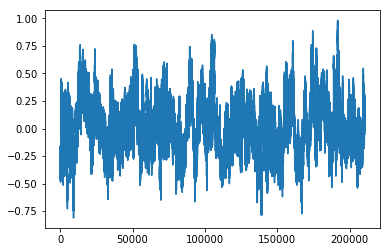

In [31]:
plt.plot(data.eeg_select[:,0])

In [41]:
print(label)
print(data.pos[-2])

[ 1.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.
  0.  0.  1.  1.  1.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.
  0.  1.  0.  1.  1.  1.  0.  0.  1.  0.  1.  1.  1.  0.  1.  1.  1.  0.
  1.  0.  0.  1.  0.  0.  1.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.  1.
  0.  0.  1.  1.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.
  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  1.
  1.  1.  0.  0.  1.  0.  0.  1.  0.  1.  1.  0.  1.  1.  0.  1.  0.  0.
  1.  0.  1.  1.  1.  0.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  1.  0.
  0.  1.  1.  1.  1.  0.  0.  1.  0.  0.  1.  1.  0.  0.  1.  1.  1.  0.
  0.  0.  1.  0.  0.  1.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  1.  0.
  1.  0.  1.  0.  0.  0.  0.  1.  1.  1.  1.  0.]
207534


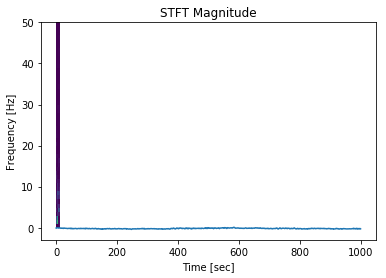

In [43]:
from scipy import signal
Cz = data.eeg_select[207000:208000, 0]
plt.plot(Cz)

f, t, Zxx = signal.spectrogram(Cz, fs=100, window='hann', nperseg=100, noverlap=92)

plt.pcolormesh(t, f, np.abs(Zxx), vmin=0)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')



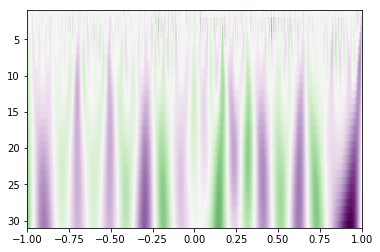

In [44]:
widths = np.arange(1, 31)
cwtmatr = signal.cwt(Cz, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 31, 1], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())


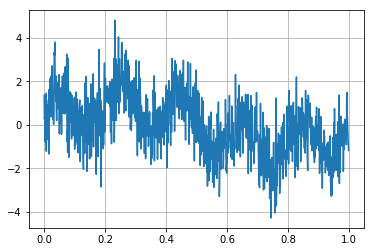

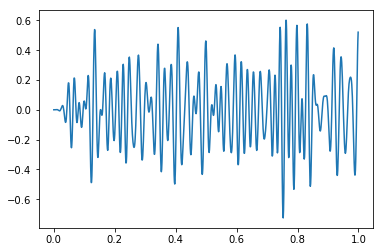